In [1]:
import numpy as np
import muon as mu
import scanpy as sc
import os
import pandas as pd
import anndata as ad
import textalloc as ta
import glasbey
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerBase
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerBase
import matplotlib

available_fonts = set(matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf'))
helvetica_fonts = [f for f in available_fonts if 'Helvetica' in f]
if helvetica_fonts:

    plt.rcParams['font.family'] = 'Helvetica'
else:
    print("Helvetica font is not available on your system. Falling back to default.")

%load_ext autoreload
%autoreload 2

def return_palette(names):
    known_cell_types = {
        'B Cells':                  ('#964b00', 'Lymphoid Cells', 'B Cell Lineage'),
        'B/Plasma Cells':           ('#6F4E37', 'Lymphoid Cells', 'B Cell Lineage'),
        'Plasma':                   ('#c19a6b', 'Lymphoid Cells', 'B Cell Lineage'),
        'Naive CD8+ T':             ('#A8E4A0', 'Lymphoid Cells', 'Cytotoxic T Cells'),        
        'Circ. Eff. Memory T':      ('#98FB98', 'Lymphoid Cells', 'Cytotoxic T Cells'),
        'Cytotoxic CD8+':           ('#A7F432', 'Lymphoid Cells', 'Cytotoxic T Cells'),
        'RM CD8+ T Cells':          ('#D0F0C0', 'Lymphoid Cells', 'Cytotoxic T Cells'),
        'RM CD8+ T cells':          ('#D0F0C0', 'Lymphoid Cells', 'Cytotoxic T Cells'),
        'CD8 Eff. Memory T':        ('#D1FFBD', 'Lymphoid Cells', 'Cytotoxic T Cells'),        
        'Gamma-Delta T':            ('#9acd32', 'Lymphoid Cells', 'Specialized T Cells'),
        'T Cells':                  ('#4CBB17', 'Lymphoid Cells', 'T Cells'),
        'T Cells 1':                ('#08A04B', 'Lymphoid Cells', 'T Cells'),
        'T Cells 2':                ('#227442', 'Lymphoid Cells', 'T Cells'),
        'T Cells 3':                ('#254117', 'Lymphoid Cells', 'T Cells'),
        'Naive CD4+ T':             ('#48A860', 'Lymphoid Cells', 'T helper Cells'),
        'CD4+ T helper':            ('#50a88b', 'Lymphoid Cells', 'T helper Cells'),
        'Naive/CM CD4+ T':          ('#2E8B57', 'Lymphoid Cells', 'T helper Cells'),
        'Th 17':                    ('#00A86B', 'Lymphoid Cells', 'T helper Cells'),
        'Th 1':                     ('#50C878', 'Lymphoid Cells', 'T helper Cells'),
        'CD4+ KLRB1 Th':            ('#74C365', 'Lymphoid Cells', 'T helper Cells'),
        'Regulatory T':             ('#0B6623',	'Lymphoid Cells', 'T helper Cells'),
        'Circ. NK':                 ('#8F9779', 'Lymphoid Cells', 'NK/NKT'),
        'Tissue Resident NK':       ('#708238', 'Lymphoid Cells', 'NK/NKT'),
        'NK Cells':                 ('#568203', 'Lymphoid Cells', 'NK/NKT'),
        'NK/NKT Cells':             ('#839B17', 'Lymphoid Cells', 'NK/NKT'),
        'NKT Cells':                ('#043927', 'Lymphoid Cells' , 'NK/NKT'),        
        'ILCs':                     ('#7fff00', 'Lymphoid Cells', 'Innate Lymphoid Cells'),
        'Prol. TAM':                ('#93FFE8', 'Myeloid Cells', 'Tumor Associated Macrophages'),
        'Mg-TAM':                   ('#DA2C43', 'Myeloid Cells', 'Mg-TAM'),
        'Hypoxic Mg-TAM':           ('#A50B5E', 'Myeloid Cells', 'Mg-TAM'),
        'IFN Mg-TAM':               ('#F64A8A', 'Myeloid Cells', 'Mg-TAM'),
        'Phago/Lipid Mg-TAM':       ('#F987C5', 'Myeloid Cells', 'Mg-TAM'),
        'Mo-TAM':                   ('#00637C', 'Myeloid Cells', 'Mo-TAM'),
        'IFN Mo-TAM':               ('#005F5F', 'Myeloid Cells', 'Mo-TAM'),
        'Lipid Mo-TAM':             ('#008794', 'Myeloid Cells', 'Mo-TAM'),
        'Hypoxic Mo-TAM':           ('#5F9EA0', 'Myeloid Cells', 'Mo-TAM'),
        'SEPP1+ Mo-TAM':            ('#80fdff', 'Myeloid Cells', 'Mo-TAM'),
        'Transitory Mo-TAM':        ('#00d9dc', 'Myeloid Cells', 'Mo-TAM'),
        'Macrophages 1':            ('#151B54', 'Myeloid Cells', 'Macrophages'),
        'Macrophages 2':            ('#191970', 'Myeloid Cells', 'Macrophages'),
        'Macrophages 3':            ('#0000A5', 'Myeloid Cells', 'Macrophages'),
        'Macrophages 4':            ('#0000CD', 'Myeloid Cells', 'Macrophages'),
        'Bile-duct LAMs':           ('#5865F2', 'Myeloid Cells', 'Macrophages'),
        'MoMac1':                   ('#0020C2', 'Myeloid Cells', 'Macrophages'),
        'MoMac2':                   ('#0041C2', 'Myeloid Cells', 'Macrophages'),
        'Peritoneal Macs':          ('#6960EC', 'Myeloid Cells', 'Macrophages'),
        'CV/Capsule Cd207+ Macs':   ('#1D2951', 'Myeloid Cells', 'Macrophages'),
        'Macrophages':              ('#101D6B', 'Myeloid Cells', 'Macrophages'),
        'immLAMs':                  ('#000080', 'Myeloid Cells', 'Macrophages'),
        'matLAMs':                  ('#1035AC', 'Myeloid Cells', 'Macrophages'),
        'Monocytes 1':              ('#1974D2', 'Myeloid Cells', 'Mono/Mono Derived'),
        'Monocytes 2':              ('#0909FF', 'Myeloid Cells', 'Mono/Mono Derived'),   
        'Mono/mono-derived':        ('#4f86f7', 'Myeloid Cells', 'Mono/Mono Derived'), 
        'Trans. Monocytes':         ('#6495ED', 'Myeloid Cells', 'Mono/Mono Derived'),
        'Trans. Monocytes 1':       ('#b5d7fd', 'Myeloid Cells', 'Mono/Mono Derived'),               
        'Trans. Monocytes 2':       ('#82EEFD', 'Myeloid Cells', 'Mono/Mono Derived'),
        'Monocytes':                ('#87CDEE', 'Myeloid Cells', 'Mono/Mono Derived'),
        'Pat. Monocytes':           ('#008ECC', 'Myeloid Cells', 'Mono/Mono Derived'),
        'Pre-moKCs and moKCs':      ('#38ACEC', 'Myeloid Cells', 'Mono/Mono Derived'),
        'KCs':                      ('#00bfff', 'Myeloid Cells', 'Mono/Mono Derived'),
        'Basophils':                ('#000000', 'Myeloid Cells', 'Granulocytes'),
        'Mast Cells':               ('#00CC99', 'Myeloid Cells', 'Mast Cells'),
        'Neutrophils':              ('#8c8784', 'Myeloid Cells', 'Granulocytes'),
        'ASDC':                     ('#483D8B', 'Myeloid Cells', 'Dendritic Cells'),
        'DCs':                      ('#80008B', 'Myeloid Cells', 'Dendritic Cells'),
        'DCs 3':                    ('#342D7E', 'Myeloid Cells', 'Dendritic Cells'),
        'Mig. DCs':                 ('#8f00ff', 'Myeloid Cells', 'Dendritic Cells'),
        'cDCs':                     ('#80008B', 'Myeloid Cells', 'Dendritic Cells'),
        'cDCs 1':                   ('#81007F', 'Myeloid Cells', 'Dendritic Cells'),
        'Prol. cDCs 1':             ('#B041FF', 'Myeloid Cells', 'Dendritic Cells'),
        'pre-DC':                   ('#36013F', 'Myeloid Cells', 'Dendritic Cells'),
        'cDCs 2':                   ('#6F2DA8', 'Myeloid Cells', 'Dendritic Cells'),
        'Prol. cDCs 2':             ('#4B0082', 'Myeloid Cells', 'Dendritic Cells'),
        'pDCs':                     ('#D891EF', 'Myeloid Cells', 'Dendritic Cells'),
        'Endothelials':             ('#ffbf00', 'CD45- Cells', 'Endothelials'),
        'Endothelials A1':          ('#D2691E', 'CD45- Cells', 'Endothelials'),
        'Endothelials A2':          ('#CC6600', 'CD45- Cells', 'Endothelials'), 
        'Endothelials M':           ('#E66C2C', 'CD45- Cells', 'Endothelials'),
        'Endothelials S1':          ('#FF6700', 'CD45- Cells', 'Endothelials'),
        'Endothelials S2':          ('#FF5F1F', 'CD45- Cells', 'Endothelials'),
        'Endothelials S3':          ('#FE632A', 'CD45- Cells', 'Endothelials'),
        'Endothelials V':           ('#F87217', 'CD45- Cells', 'Endothelials'),
        'Central Vein ECs':         ('#fcc200', 'CD45- Cells', 'Endothelials'),
        'LSECs':                    ('#ffa700', 'CD45- Cells', 'Endothelials'),
        'Lymphatic ECs':            ('#FCE205', 'CD45- Cells', 'Endothelials'),
        'Lymphatic ECs 1':          ('#C35817', 'CD45- Cells', 'Endothelials'),
        'Lymphatic ECs 2':          ('#C04000', 'CD45- Cells', 'Endothelials'),
        'Portal Vein ECs':          ('#ffd700', 'CD45- Cells', 'Endothelials'),
        'Female Epithelials':       ('#F433FF', 'CD45- Cells', 'Epithelial/Epithelial-like'),
        'Endometrium':              ('#FF8C00', 'CD45- Cells', 'Epithelial/Epithelial-like'),        
        'Female Epithelials AV':    ('#FF77FF', 'CD45- Cells', 'Epithelial/Epithelial-like'),
        'Female Epithelials HS':    ('#FF00FF', 'CD45- Cells', 'Epithelial/Epithelial-like'),
        'Male Epithelials':         ('#A74AC7', 'CD45- Cells', 'Epithelial/Epithelial-like'),
        'Male Epithelials 1':       ('#B048B5', 'CD45- Cells', 'Epithelial/Epithelial-like'),
        'Male Epithelials 2':       ('#B666D2', 'CD45- Cells', 'Epithelial/Epithelial-like'),
        'Male Epithelials 3':       ('#7E587E', 'CD45- Cells', 'Epithelial/Epithelial-like'), 
        'Mesothelial Cells':        ('#E0115F', 'CD45- Cells', 'Epithelial/Epithelial-like'),
        'Mesothelial 1':            ('#FF4500', 'CD45- Cells', 'Epithelial/Epithelial-like'),
        'Mesothelial 2':            ('#E55451', 'CD45- Cells', 'Epithelial/Epithelial-like'),
        'Mesothelial 3':            ('#E55B3C', 'CD45- Cells', 'Epithelial/Epithelial-like'),
        'Hepatocytes':              ('#ff0090', 'CD45- Cells', 'Epithelial/Epithelial-like'),        
        'Cholangiocytes':           ('#c90016', 'CD45- Cells', 'Epithelial/Epithelial-like'),
        'Capsule Fibroblasts':      ('#cf1020', 'CD45- Cells', 'Structural/Connective Tissue'),
        'Fibroblasts':              ('#ff3800', 'CD45- Cells', 'Structural/Connective Tissue'),
        'Fibroblast 1':             ('#f08080', 'CD45- Cells', 'Structural/Connective Tissue'),
        'Fibroblast 2':             ('#ff4500', 'CD45- Cells', 'Structural/Connective Tissue'),
        'Mammary Fibroblasts':      ('#CC338B', 'CD45- Cells', 'Structural/Connective Tissue'),        
        'Stellate Cells':           ('#ff033e', 'CD45- Cells', 'Structural/Connective Tissue'),        
        'Adipocytes':               ('#FF2400', 'CD45- Cells', 'Structural/Connective Tissue'),
        'Adipocytes 1':             ('#FFFF33', 'CD45- Cells', 'Structural/Connective Tissue'),
        'Adipocytes 2':             ('#FFEF00', 'CD45- Cells', 'Structural/Connective Tissue'),
        'Adipocytes 3':             ('#FAF884', 'CD45- Cells', 'Structural/Connective Tissue'),
        'Adipocytes 4':             ('#FFE87C', 'CD45- Cells', 'Structural/Connective Tissue'),
        'Adipocytes 5':             ('#FFDB58', 'CD45- Cells', 'Structural/Connective Tissue'),
        'Adipocytes 6':             ('#FFDF00', 'CD45- Cells', 'Structural/Connective Tissue'),
        'Adipocytes 7':             ('#F9DB24', 'CD45- Cells', 'Structural/Connective Tissue'),
        'Preadipocytes':            ('#C60615', 'CD45- Cells', 'Structural/Connective Tissue'),
        'Preadipocytes 1':          ('#FBB917', 'CD45- Cells', 'Structural/Connective Tissue'),
        'Preadipocytes 2':          ('#FDBD01', 'CD45- Cells', 'Structural/Connective Tissue'),
        'Preadipocytes 3':          ('#FBB117', 'CD45- Cells', 'Structural/Connective Tissue'),
        'Preadipocytes 4':          ('#FFAE42', 'CD45- Cells', 'Structural/Connective Tissue'),
        'Preadipocytes 5':          ('#F2BB66', 'CD45- Cells', 'Structural/Connective Tissue'),
        'Preadipocytes 6':          ('#FFCE44', 'CD45- Cells', 'Structural/Connective Tissue'),
        'Pericytes':                ('#FE5BAC', 'CD45- Cells', 'Structural/Connective Tissue'),
        'Smooth Muscle Cells':      ('#B5338A', 'CD45- Cells', 'Structural/Connective Tissue'),
        'Myo Epithelials':          ('#98AFC7', 'CD45- Cells', 'Structural/Connective Tissue'),
        'Platelets':                ('#837E7C', 'CD45- Cells', 'Platelets'),
    }

    name_list = np.unique(names)
    lenght = 10 + len(name_list)
    colors = glasbey.extend_palette("tab10", palette_size=lenght)

    palette = {}

    j=0
    for name in name_list:       
        if name in known_cell_types.keys():
            palette[name] = known_cell_types[name]#[0]
        else: 
            print('\nAssingning color to unknown cell type: '+name)
            palette[name] = (colors[j], )
            j+=1
            
    return palette

transl = {'Pre-moKCs and moKCs': 'Pre-moKCs/moKCs'}

path = os.path.abspath('').replace('\\', '/')+'/'
data_path = path+'dataset/'
save_path = os.path.abspath('').replace('\\', '/')+'/results/'

sc.settings.seed = 1234
np.random.seed(1234)  

/Users/cschaech/anaconda3/envs/scSpecies_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
pred_dict = {}

mdata = mu.read_h5mu(path+'dataset/liver.h5mu')

ct_dict = return_palette(np.array(mdata.mod['mouse'].obs['cell_type_fine'].unique()))
ct_dict = sorted(ct_dict.items(), key=lambda x: (x[1][1], x[1][2]) )
ct_dict = {k: (v[0], transl.get(k, k), v[2], i + 1) for i, (k, v) in enumerate(ct_dict)}

cell_types = np.array(mdata.mod['mouse'].obs['cell_type_fine'])[mdata.mod['human'].obsm['ind_nns_hom_genes'][:,:25]]

for ct in np.intersect1d(np.array(mdata.mod['human'].obs['cell_type_fine'].unique()), np.array(mdata.mod['mouse'].obs['cell_type_fine'].unique())):
    ind = np.where(mdata.mod['human'].obs['cell_type_fine'] == ct)[0]
    most_common_labels = pd.DataFrame(cell_types[ind]).mode(axis=1)
    pred_dict[ct] = (cell_types[ind], most_common_labels[0].values, np.array(mdata.mod['human'][ind].obs['batch']))
    
charts = {}

for ct, (labels, most_labels, batches) in pred_dict.items():
    batch, counts = np.unique(batches, return_counts=True)
    
    bn_dict = {}
    large_counts = batch[counts > 50]
    
    if len(large_counts) > 4:
        max_vals = []
        
        for i, bn in enumerate(large_counts[np.flip(np.argsort(large_counts))[:4]]):
            ind = np.where(batches == bn)[0]
            if i < 4:
                bn_dict[bn] = np.unique(labels[ind], return_counts=True)
                charts[ct] = bn_dict
            max_vals.append((bn_dict[bn][1] / bn_dict[bn][1].sum()).max())
    
        print(ct, len(large_counts), np.mean(np.array(max_vals)), np.std(np.array(max_vals)))        

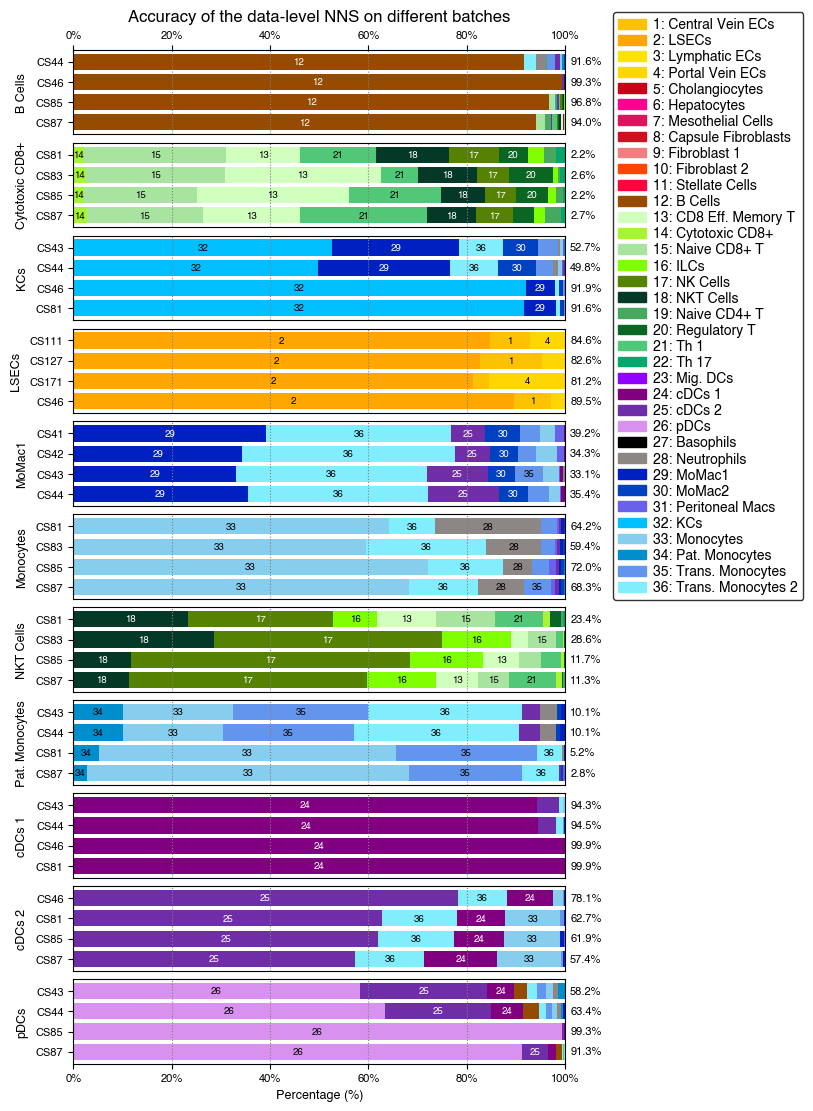

In [ ]:
matplotlib.rcParams['font.family'] = 'Helvetica'  
percentage_ticks = [0, 20, 40, 60, 80, 100]

fig_height = sum(len(items.keys()) for items in charts.values()) * 0.25
fig, axes = plt.subplots(len(charts), 1, figsize=(6, fig_height), constrained_layout=True, gridspec_kw={'height_ratios': [len(items.keys()) for items in charts.values()]})

for k,(ax, (ct, items)) in enumerate(zip(axes, charts.items())):
    batches = list(items.keys())
    cell_labels_set = set()
    for _, (cell_labels, _) in items.items():
        cell_labels_set.update(cell_labels)

    data = {label: [0] * len(batches) for label in cell_labels_set}
    for i, (bn, (cell_labels_batch, counts)) in enumerate(items.items()):
        for label, count in zip(cell_labels_batch, counts):
            data[label][i] = count

    total_counts = [sum(data[label][i] for label in cell_labels_set) for i in range(len(batches))]
    for label in cell_labels_set:
        data[label] = [count / total * 100 if total > 0 else 0 for count, total in zip(data[label], total_counts)]

    sorted_labels = sorted(data.keys(), key=lambda x: -sum(data[x]))
    if ct in sorted_labels:
        sorted_labels.remove(ct)
    sorted_labels = [ct] + sorted_labels

    bottom = None
    bar_width = 0.8  
    for label in sorted_labels:
        percentages = data[label]
        color = ct_dict.get(label, ('#cccccc',))[0] 
        bars = ax.barh(batches, percentages, height=bar_width, label=label, color=color, left=bottom)
        bottom = percentages if bottom is None else [b + p for b, p in zip(bottom, percentages)]

        for bar, percent in zip(bars, percentages):
            if percent > 5 or label == ct:
                ax.text(
                    x=bar.get_x() + bar.get_width() / 2,
                    y=bar.get_y() + bar.get_height() / 2,
                    s=f"{ct_dict[label][-1]}",
                    ha="center",
                    va="center",
                    fontsize=7,
                    color="white" if ct_dict[label][-1] in [18, 27, 12, 20, 29, 25, 24, 30, 17] else "black",  
                )

    for i, batch in enumerate(batches):
        c_label, c_counts = items[batch]
        match_percentage = c_counts[np.where(c_label == ct)[0]][0] / np.sum(c_counts) * 100
        ax.text(
            x=101,
            y=i, 
            s=f"{match_percentage:.1f}%", 
            va="center", 
            fontsize=8, 
            color="black"
        )

    if k == 0:
        ax.set_title('Accuracy of the data-level NNS on different batches')
        ax.set_xticks(percentage_ticks)
        ax.xaxis.tick_top() 
        ax.set_xticklabels([f"{tick}%" for tick in percentage_ticks], fontsize=8)
        ax.tick_params(axis="x", labeltop=True, labelbottom=False)  
    elif k == len(axes) - 1:
        ax.set_xticks(percentage_ticks)
        ax.set_xticklabels([f"{tick}%" for tick in percentage_ticks], fontsize=8)
        ax.set_xlabel("Percentage (%)", fontsize=9)
    else:
        ax.set_xticks([])

    for tick in percentage_ticks:
        ax.axvline(tick, linestyle="dotted", color="grey", linewidth=0.8)

    ax.set_ylabel(f"{ct}", fontsize=9, labelpad=10, ha="center", va="center")
    ax.tick_params(axis="y", labelsize=8)

legend = fig.legend(handles=[mpatches.Patch(color=ct_dict[label][0], 
                    label=str(ct_dict[label][-1])+': '+ct_dict[label][1]) for label in list(ct_dict.keys())], 
                    loc='upper left', 
                    bbox_to_anchor=(1, 1), 
                    labelspacing=0.15, 
                    handlelength=2, 
                    handletextpad=0.5, 
                    markerscale=2
                    )

legend.get_frame().set_linewidth(1)  
legend.get_frame().set_edgecolor('black') 

fig.savefig(save_path+"liver_mouse_human_neighbor_search_acc.pdf", format="pdf", bbox_inches="tight")

